In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train= pd.read_csv("quora-question-pairs/train.csv")
test= pd.read_csv("quora-question-pairs/test.csv")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [10]:
len(train)

404290

In [11]:
len(test)

3563475

### 질문 중복 분석

In [13]:
train_set= pd.Series(train['question1'].tolist()+train['question2'].tolist()).astype(str)

In [14]:
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [17]:
## 중복 데이터 제거
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts()>1)))

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


(array([5.20866e+05, 9.59000e+03, 2.93000e+03, 1.45700e+03, 7.91000e+02,
        6.86000e+02, 3.22000e+02, 2.21000e+02, 1.44000e+02, 1.01000e+02,
        8.90000e+01, 3.20000e+01, 4.40000e+01, 2.60000e+01, 1.60000e+01,
        2.40000e+01, 9.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  1. ,   4.2,   7.4,  10.6,  13.8,  17. ,  20.2,  23.4,  26.6,
         29.8,  33. ,  36.2,  39.4,  42.6,  45.8,  49. ,  52.2,  55.4,
         58.6,  61.8,  65. ,  68.2,  71.4,  74.6,  77.8,  81. ,  84.2,
         87.4,  90.6,  93.8,  97. , 100.2, 103.4, 106.6

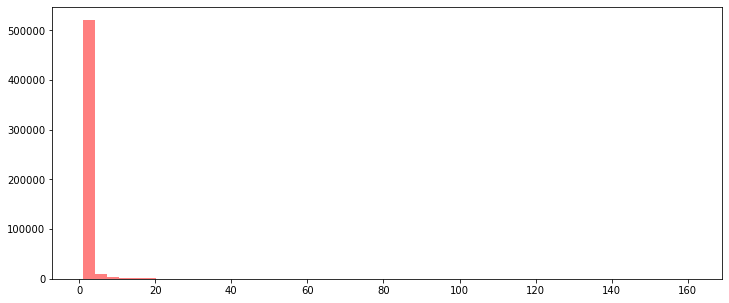

In [21]:
## 그래프
## figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))

## 히스토그램 선언
# bins: 히스토그램 값들에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨링

plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


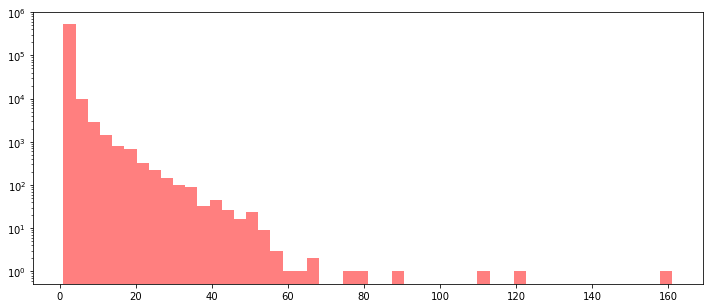

In [22]:
## 그래프
## figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))

plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')

## 로그 값 적용해서 전체적인 분포를 살펴본다.
plt.yscale('log', nonposy='clip')

- 중복 데이터는 60개까지 주로 분포가 되어있음

{'whiskers': [<matplotlib.lines.Line2D at 0x1c28cf805c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c28cf80ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c28cf80518>],
 'medians': [<matplotlib.lines.Line2D at 0x1c28cf8b198>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c28cf8b668>],
 'means': [<matplotlib.lines.Line2D at 0x1c28cf8b470>]}

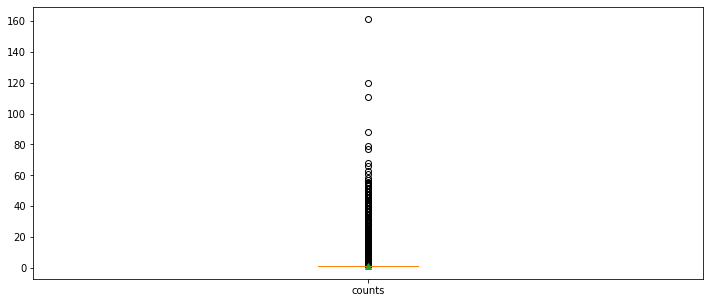

In [24]:
plt.figure(figsize=(12,5))

## 박스 플롯
## labels: 입력한 데이터에 대한 마크
## showmeans: 평균값을 마크

plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans=True)

- 박스플롯으로 살펴봐도 60개까지 다수 분포가 되어있는것으로 확인

(-0.5, 799.5, 599.5, -0.5)

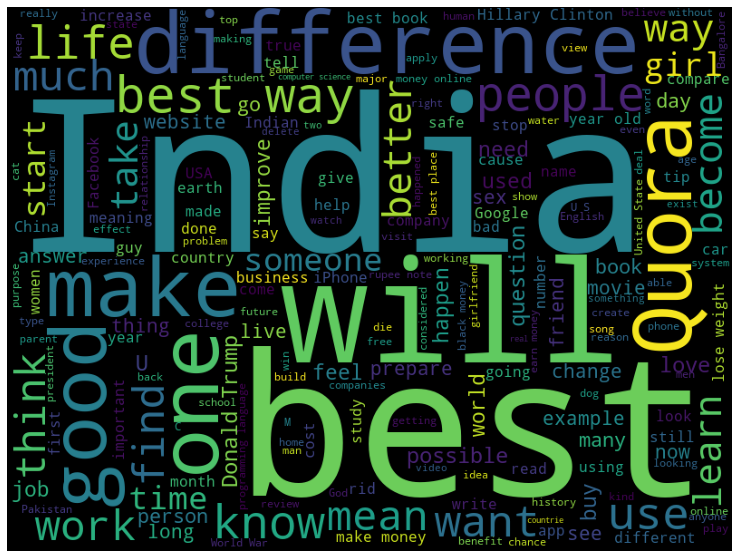

In [25]:
from wordcloud import WordCloud
cloud= WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

### 라벨에 따른 데이터 개수 분포

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

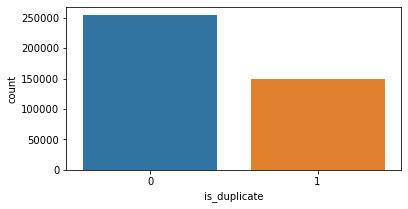

In [26]:
fig, axe= plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train['is_duplicate'])

- 중복이 아닌 데이터가 25만개, 중복인 데이터가 라벨링이 15만개로 편향된 데이터

In [31]:
## 글자 길이값

train_length= train_set.apply(len)

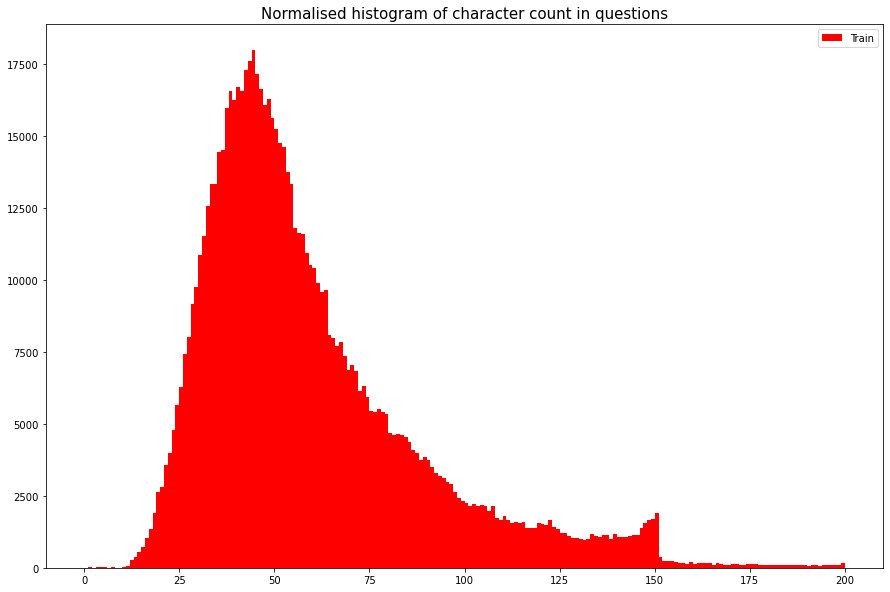

In [34]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', label='Train')
plt.title('Normalised histogram of character count in questions',fontsize=15)
plt.legend()

- 데이터의 각 질문의 분포는 15~150에 대부분 모여 있고, 150자에서 급격하게 줄어드는 것으로 보아 질문의 길이의 제한이 150자로 추정

In [36]:
## 단어 길이값
train_word_counts= train_set.apply(lambda x:len(x.split(' ')))

(array([0.0000e+00, 9.1000e+01, 1.2000e+02, 6.7260e+03, 2.0032e+04,
        3.7985e+04, 6.2711e+04, 8.6292e+04, 9.6164e+04, 8.9789e+04,
        7.8985e+04, 5.8348e+04, 4.7026e+04, 3.6524e+04, 3.1947e+04,
        2.6547e+04, 2.1587e+04, 1.5770e+04, 1.3503e+04, 1.1527e+04,
        9.9460e+03, 8.2960e+03, 7.2190e+03, 6.0980e+03, 5.6180e+03,
        5.0560e+03, 5.0170e+03, 4.0520e+03, 3.3420e+03, 2.1690e+03,
        1.7600e+03, 1.2950e+03, 9.4300e+02, 7.6000e+02, 5.9000e+02,
        5.3500e+02, 4.8500e+02, 4.7200e+02, 4.3400e+02, 3.8600e+02,
        2.8400e+02, 1.5800e+02, 1.4500e+02, 1.6600e+02, 1.1900e+02,
        1.3300e+02, 1.0900e+02, 9.6000e+01, 9.1000e+01, 1.9700e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 a

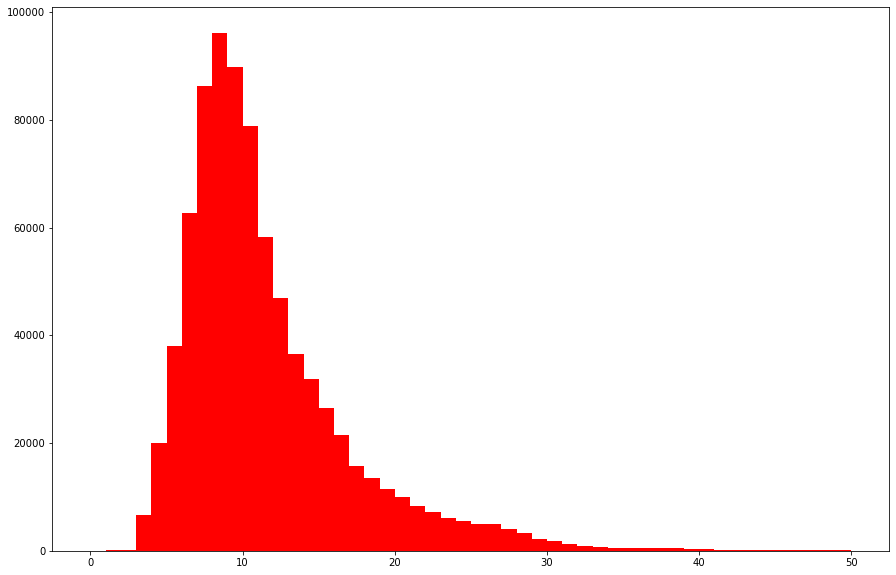

In [37]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, range=[0,50], color='r')

- 대부분 10개 단어로 구성이 되어있고, 30개 이상의 단어는 극히 적음